In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

Phase Functions
==============
$g$ - Assymetry factor,
$\theta$ - angle between incoming and outgoing rays
Henyey-Greenstein
-----------------

$$
p_{\text{HG}} (\cos \theta)= \frac{1}{4\pi} \frac{1 - g^2}{(1 + g^2 - 2g(\cos \theta))^{3/2}}
$$

Schlick approximation of HG
-------------------------------

$$
p_{\text{Schlick}} (\cos \theta) = \frac{1}{4\pi} \frac{1 - k^2}{(1 - k \cos \theta)^2}
$$
$$
k = 1.55g - 0.55*g^3
$$

Rayleigh (reference ?)
-------------------------

$$
p_{\text{Rayleigh}} (\cos \theta) = \frac{3}{16\pi} \left(1 + (\cos \theta)^2\right)
$$

Mie-Hazy
---------

$$
p_{\text{MH}} (\cos \theta) = \frac{\frac{1}{2} + 4.5 \left(\frac{(1 + \cos \theta)}{2}\right)^8}{4\pi}
$$

Mie-Murky
----------

$$
p_{\text{MM}} (\cos \theta) = \frac{\frac{1}{2} + 16.5 \left(\frac{(1 + \cos \theta)}{2}\right)^{32}}{4\pi}
$$

In [2]:
def henyeygreenstein(theta, g = .0, one = 0, exp = 1):
    return (1 - g**2) / (one + (1 + g**2 - 2 * g * theta)**exp) / 4 / np.pi

def schlick(theta, g = .0, one = 0):
    k = 1.55*g - 0.55 * g**3
    return (1 - k**2) / (one + (1 - k * theta)**2) / 4 / np.pi

def normalized_hg(theta, g):
    gg = 1 if g > 0 else -1
    return henyeygreenstein(theta, g, 0) / henyeygreenstein(gg, g, 0)

def normalized_schlick(theta, g):
    gg = 1 if g > 0 else -1
    return schlick(theta, g, 0) / schlick(gg, g, 0)

def rayleigh(theta):
    return 3 * (1 + theta**2) / 16 /np.pi

def mie(theta, k = 1):
    return 0.5 + (4 * k + 0.5) * (0.5 * (1 - theta))**(4 * k) / 4 / np.pi

In [3]:
def draw_plots_param(funcs, xs, param=None, param_name="", figwidth=16, num_columns = 2):
    """
    :param funs: iterable of tuples (function, name). Signature of a function should be function(xs, param).
    :param xs: X axiz values.
    :param param: list of parameters for function.
    :param figwidth: Width of figure.
    :param num_columns: Number of columns.
    """
    num_funcs = len(funcs)

    if num_columns:
        num_rows = np.ceil(float(num_funcs) / num_columns).astype(np.uint)
    else:
        num_columns = np.ceil(np.sqrt(num_funcs)).astype(np.uint)
        num_rows = 1

    figheight = num_rows * figwidth / num_columns
    fig = plt.figure(figsize=(figwidth, figheight))

    for i, (func, name) in enumerate(funcs, 1):
        ax = fig.add_subplot(num_rows, num_columns, i, title=name)
        ax.grid(True)
        if param:
            for val in param:
                pp = ax.plot(xs, func(xs, val), label="{} = {:.1f}".format(param_name, val))
        else:
            pp = ax.plot(xs, func)
        lg = ax.legend(loc=0)

In [4]:
def draw_phases(funcs, param=None, param_name="",
                subdivs = 50, figwidth=16, num_columns = 2):
    num_funcs = len(funcs)

    if num_columns:
        num_rows = np.ceil(float(num_funcs) / num_columns).astype(np.uint)
    else:
        num_columns = np.ceil(np.sqrt(num_funcs)).astype(np.uint)
        num_rows = 1

    figheight = num_rows * figwidth / num_columns
    fig = plt.figure(figsize=(figwidth, figheight))
    
    for i, (func, name) in enumerate(funcs, 1):
        ax = fig.add_subplot(num_rows, num_columns, i, title=name, projection='polar')
        ax.grid(True)
        if param:
            for val in param:
                theta = np.linspace(0, 2 * np.pi, subdivs)
                r = np.sqrt(func(np.cos(theta), val))
                ax.plot(theta, r, label="{} = {:.1f}".format(param_name, val))
            lg = ax.legend(loc=0)
        else:
            theta = np.linspace(0, 2 * np.pi, subdivs)
            r = func(np.cos(theta))
            ax.plot(theta, r)

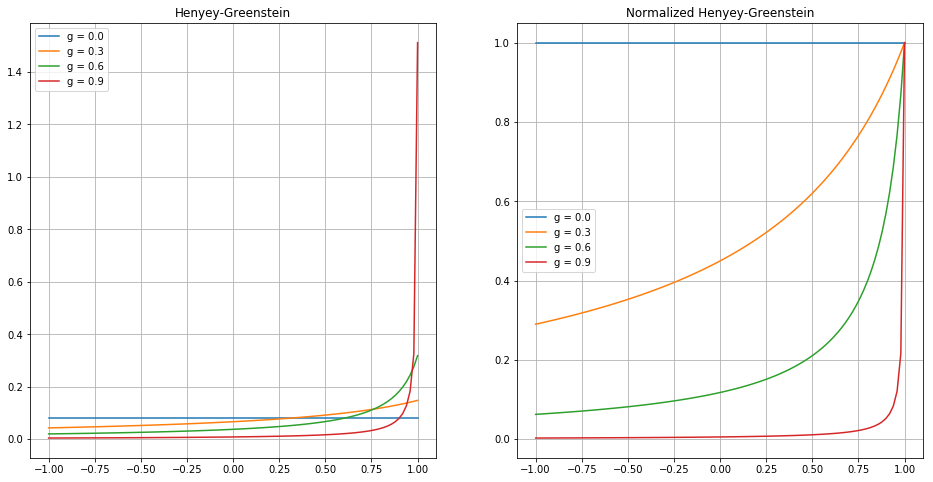

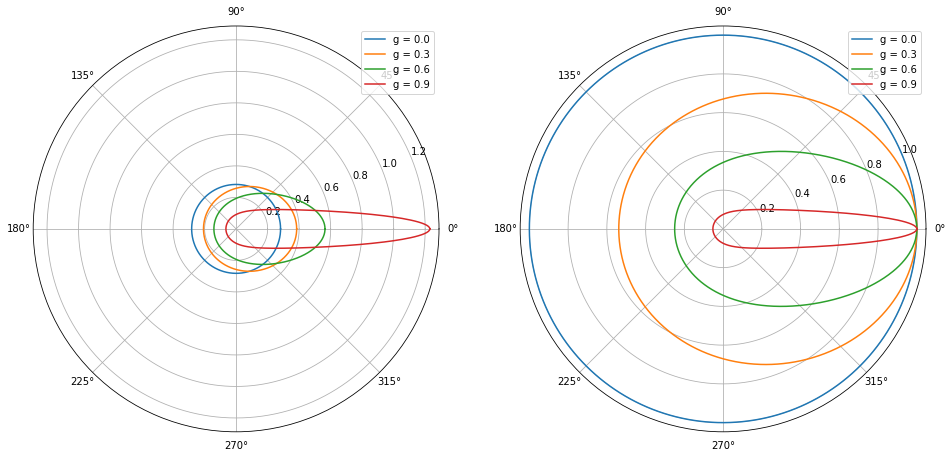

In [5]:
xs = np.linspace(-1, 1, 100)

funcs = ((henyeygreenstein, "Henyey-Greenstein"),
         (normalized_hg, "Normalized Henyey-Greenstein"))

gs = list(np.arange(0, 1, 0.3))

draw_plots_param(funcs, xs, param = gs, param_name = "g")
draw_phases(funcs, param = gs, param_name="g", subdivs=1000)

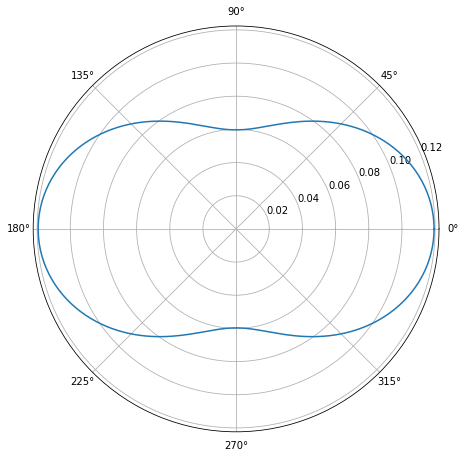

In [6]:
draw_phases(((rayleigh, "Rayleigh"),), subdivs=200)

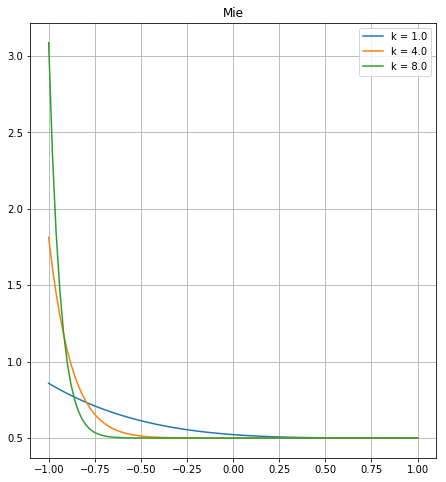

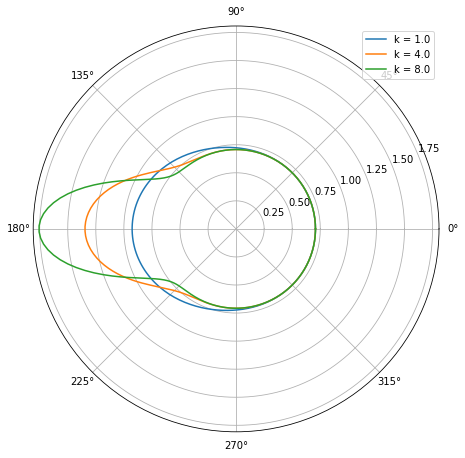

In [7]:
mies = ((mie, "Mie"),)
mie_params = [1, 4, 8]

draw_plots_param(mies, xs, param = mie_params, param_name="k")
draw_phases(mies, param = mie_params, param_name="k", subdivs=200)